<a href="https://colab.research.google.com/github/andricmitrovic/ML-activity/blob/main/delta_rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn import datasets
from tqdm import tqdm
from matplotlib import pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
(data, target) = datasets.load_breast_cancer(return_X_y=True)

In [4]:
data = np.hstack((data, np.ones((data.shape[0], 1))))       # inserted bias at the end, some error with numpy rounding down floats if i insert np.ones first
data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 4.601e-01, 1.189e-01,
        1.000e+00],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 2.750e-01, 8.902e-02,
        1.000e+00],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 3.613e-01, 8.758e-02,
        1.000e+00],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 2.218e-01, 7.820e-02,
        1.000e+00],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 4.087e-01, 1.240e-01,
        1.000e+00],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 2.871e-01, 7.039e-02,
        1.000e+00]])

In [5]:
class Perceptron:
    def __init__(self, xs, ys, iters = 3000, lr = 0.0001):
        self.iters = iters
        self.lr = lr
        self.xs = xs
        self.ys = ys
        self.w = self.init_weights()
        self.mse_history = []

    def init_weights(self):
      _, k = self.xs.shape
      return np.random.normal(size = k)

    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def predict(self, x):
      y = np.dot(self.w, x)
      return self.sigmoid(y)
    
    def learn(self):
      N, k = self.xs.shape
      for _ in tqdm(range(self.iters)):
        mse = 0
        delta_w = np.zeros(k)
        for i in range(N):
          x = self.xs[i]
          y = self.ys[i]
          out = self.predict(x)
          delta_w += self.lr * (y - out) * out * (1.0 - out) * x
          mse += (y - out)**2
        self.w += delta_w
        mse = mse / (2 * N)
        #print(mse)
        self.mse_history.append(mse)
      return self.w, self.mse_history

In [6]:
model = Perceptron(data, target)
w, mse_history = model.learn()
w

  0%|          | 0/3000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
100%|██████████| 3000/3000 [00:42<00:00, 71.36it/s] 


array([ 0.64628081,  0.15627768,  1.50253   ,  1.27291893, -0.23253115,
       -0.23460613,  1.57707203,  0.7661162 , -0.46632179,  0.5439081 ,
       -0.45469216, -0.437853  ,  0.28737198, -1.69530943, -1.72469755,
       -0.5619828 , -1.01197533,  0.31431503, -0.90771902, -1.41215769,
        1.63585056,  0.08516494,  1.03200852, -1.27737237, -0.54239208,
        0.10813633, -1.15614961,  0.37368427, -0.59751632, -0.29039105,
       -0.57915719])

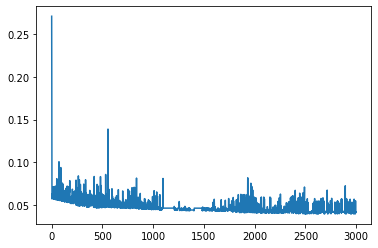

In [7]:
plt.plot(mse_history)